# Libararies

In [36]:
import pandas as pd
from IPython.display import display
from tensorflow import keras
from tensorflow.keras import layers

# Working with data

In [37]:
ion = pd.read_csv('/content/ion.csv', index_col=0)
display(ion.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [38]:
df = ion.copy()
df["Class"] = df["Class"].map({"good": 0, "bad": 1})
df_train = df.sample(frac=0.7, random_state=0)
display(df_train.index)
df_test = df.drop(df_train.index)

Index([  7,  53, 115,  46, 107, 259, 187, 230, 214,  90,
       ...
       261,  87,  11,  37, 335,  59,  42,  15, 156,  51],
      dtype='int64', length=246)

In [39]:
ion.shape

(351, 35)

In [40]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_test = (df_test - min_) / (max_ - min_)


In [41]:
df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
7,1.0,NaN,0.987940,0.44699,0.973005,0.396000,0.964030,0.358250,0.929980,0.363290,...,0.091830,0.568295,0.087450,0.523030,0.088025,0.478690,0.09341,0.430840,0.095125,0.0
53,1.0,NaN,1.000000,1.00000,1.000000,1.000000,0.955050,1.000000,0.365150,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.32657,1.000000,0.674225,0.0
115,1.0,NaN,0.956765,0.90793,0.135135,1.000000,0.302670,0.778675,0.527025,0.648650,...,0.500010,0.499995,0.500000,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000,1.0
46,0.0,NaN,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.50000,0.500000,0.500000,1.0
107,1.0,NaN,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,1.000000,0.554880,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.0,NaN,1.000000,0.52906,0.972625,0.537090,0.999760,0.566155,1.000000,0.490445,...,0.612155,0.942115,0.617855,0.942840,0.612555,0.891620,0.64788,0.917870,0.655830,0.0
42,1.0,NaN,0.000000,0.00000,1.000000,1.000000,1.000000,0.428125,0.500000,0.500000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.500000,0.500000,1.0
15,1.0,NaN,1.000000,0.53690,1.000000,0.517100,1.000000,0.472185,1.000000,0.543820,...,0.600165,1.000000,0.683715,0.978015,0.743205,1.000000,0.66246,1.000000,0.733560,0.0
156,1.0,NaN,0.862070,0.49458,0.898520,0.505420,0.900000,0.500985,0.895075,0.505420,...,0.492610,0.890205,0.503060,0.870445,0.474875,0.914780,0.51478,0.895075,0.503940,0.0


In [42]:
df_train.dropna(axis=1, inplace=True)
df_test.dropna(axis=1, inplace=True)

In [43]:
X_train = df_train.drop("Class", axis=1)
y_train = df_train["Class"]
X_test = df_test.drop("Class", axis=1)
y_test = df_test["Class"]

# **WORKING ON MODEL**

In [44]:
model = keras.Sequential([
    keras.Input(shape=(33,)),
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [45]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=["binary_accuracy"]
)

In [46]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

In [47]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose = 0
)

<Axes: title={'center': 'Accuracy'}>

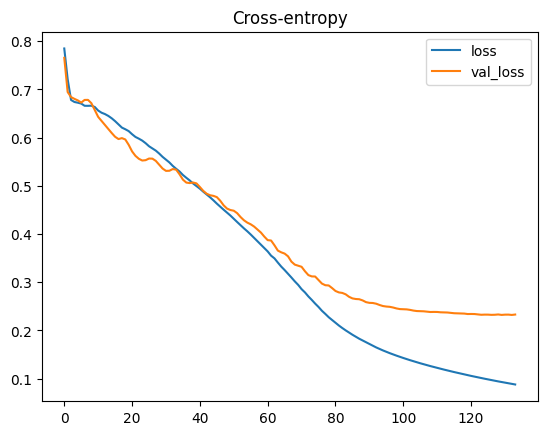

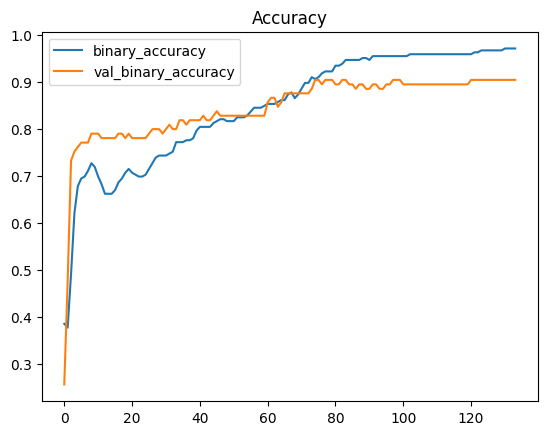

In [48]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "val_loss"]].plot(title="Cross-entropy")
history_df.loc[:, ["binary_accuracy", "val_binary_accuracy"]].plot(title="Accuracy")

In [49]:
history_df

,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.386179,0.784751,0.257143,0.765374
1,0.378049,0.721050,0.476190,0.694460
2,0.491870,0.677940,0.733333,0.683926
3,0.621951,0.673795,0.752381,0.680252
4,0.678862,0.672297,0.761905,0.677059
...,...,...,...,...
129,0.967480,0.093026,0.904762,0.232237
130,0.971545,0.091740,0.904762,0.232771
131,0.971545,0.090448,0.904762,0.232852
132,0.971545,0.089206,0.904762,0.232178


from matplotlib import pyplot as plt
history_df['binary_accuracy'].plot(kind='hist', bins=20, title='binary_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
history_df['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
history_df['val_binary_accuracy'].plot(kind='hist', bins=20, title='val_binary_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
history_df['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
history_df.plot(kind='scatter', x='binary_accuracy', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
history_df.plot(kind='scatter', x='loss', y='val_binary_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
history_df.plot(kind='scatter', x='val_binary_accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
history_df['binary_accuracy'].plot(kind='line', figsize=(8, 4), title='binary_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
history_df['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
history_df['val_binary_accuracy'].plot(kind='line', figsize=(8, 4), title='val_binary_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
history_df['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)